In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df = df[['Review text','Ratings']]

In [5]:
df = df.dropna()

In [6]:
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8505,Delivered before time but price is high from m...,3
8506,up to the mark but same is available in market...,4
8507,Nice delivery speedREAD MORE,5
8508,No complaints about the item . Its the best on...,5


In [7]:
df['Ratings'] = df['Ratings'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

In [8]:
df['Ratings'].value_counts(normalize = True)

1    0.874031
0    0.125969
Name: Ratings, dtype: float64

# Identify input and output

In [9]:
X = df['Review text']
y = df['Ratings']

# Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.25 , random_state=1)

In [11]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6382,) (2128,)
(6382,) (2128,)


In [12]:
X_train

1095                                 Very nice 👍READ MORE
7326                    Very good on dry weatherREAD MORE
1377                                  Well brandREAD MORE
2127    Firstly  Yonex is best company  for badminton ...
5096                                        GoodREAD MORE
                              ...                        
2895                              Quality good..READ MORE
7813             NOT BAD ITS REALLY GOOD QUALITYREAD MORE
905                                         GoodREAD MORE
5192                                    very badREAD MORE
235                            Bad Quality,,,,,,READ MORE
Name: Review text, Length: 6382, dtype: object

# Data preprocessing

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
def word_cloud(data):
    w_c = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(w_c)
    plt.axis('off')
    plt.show()

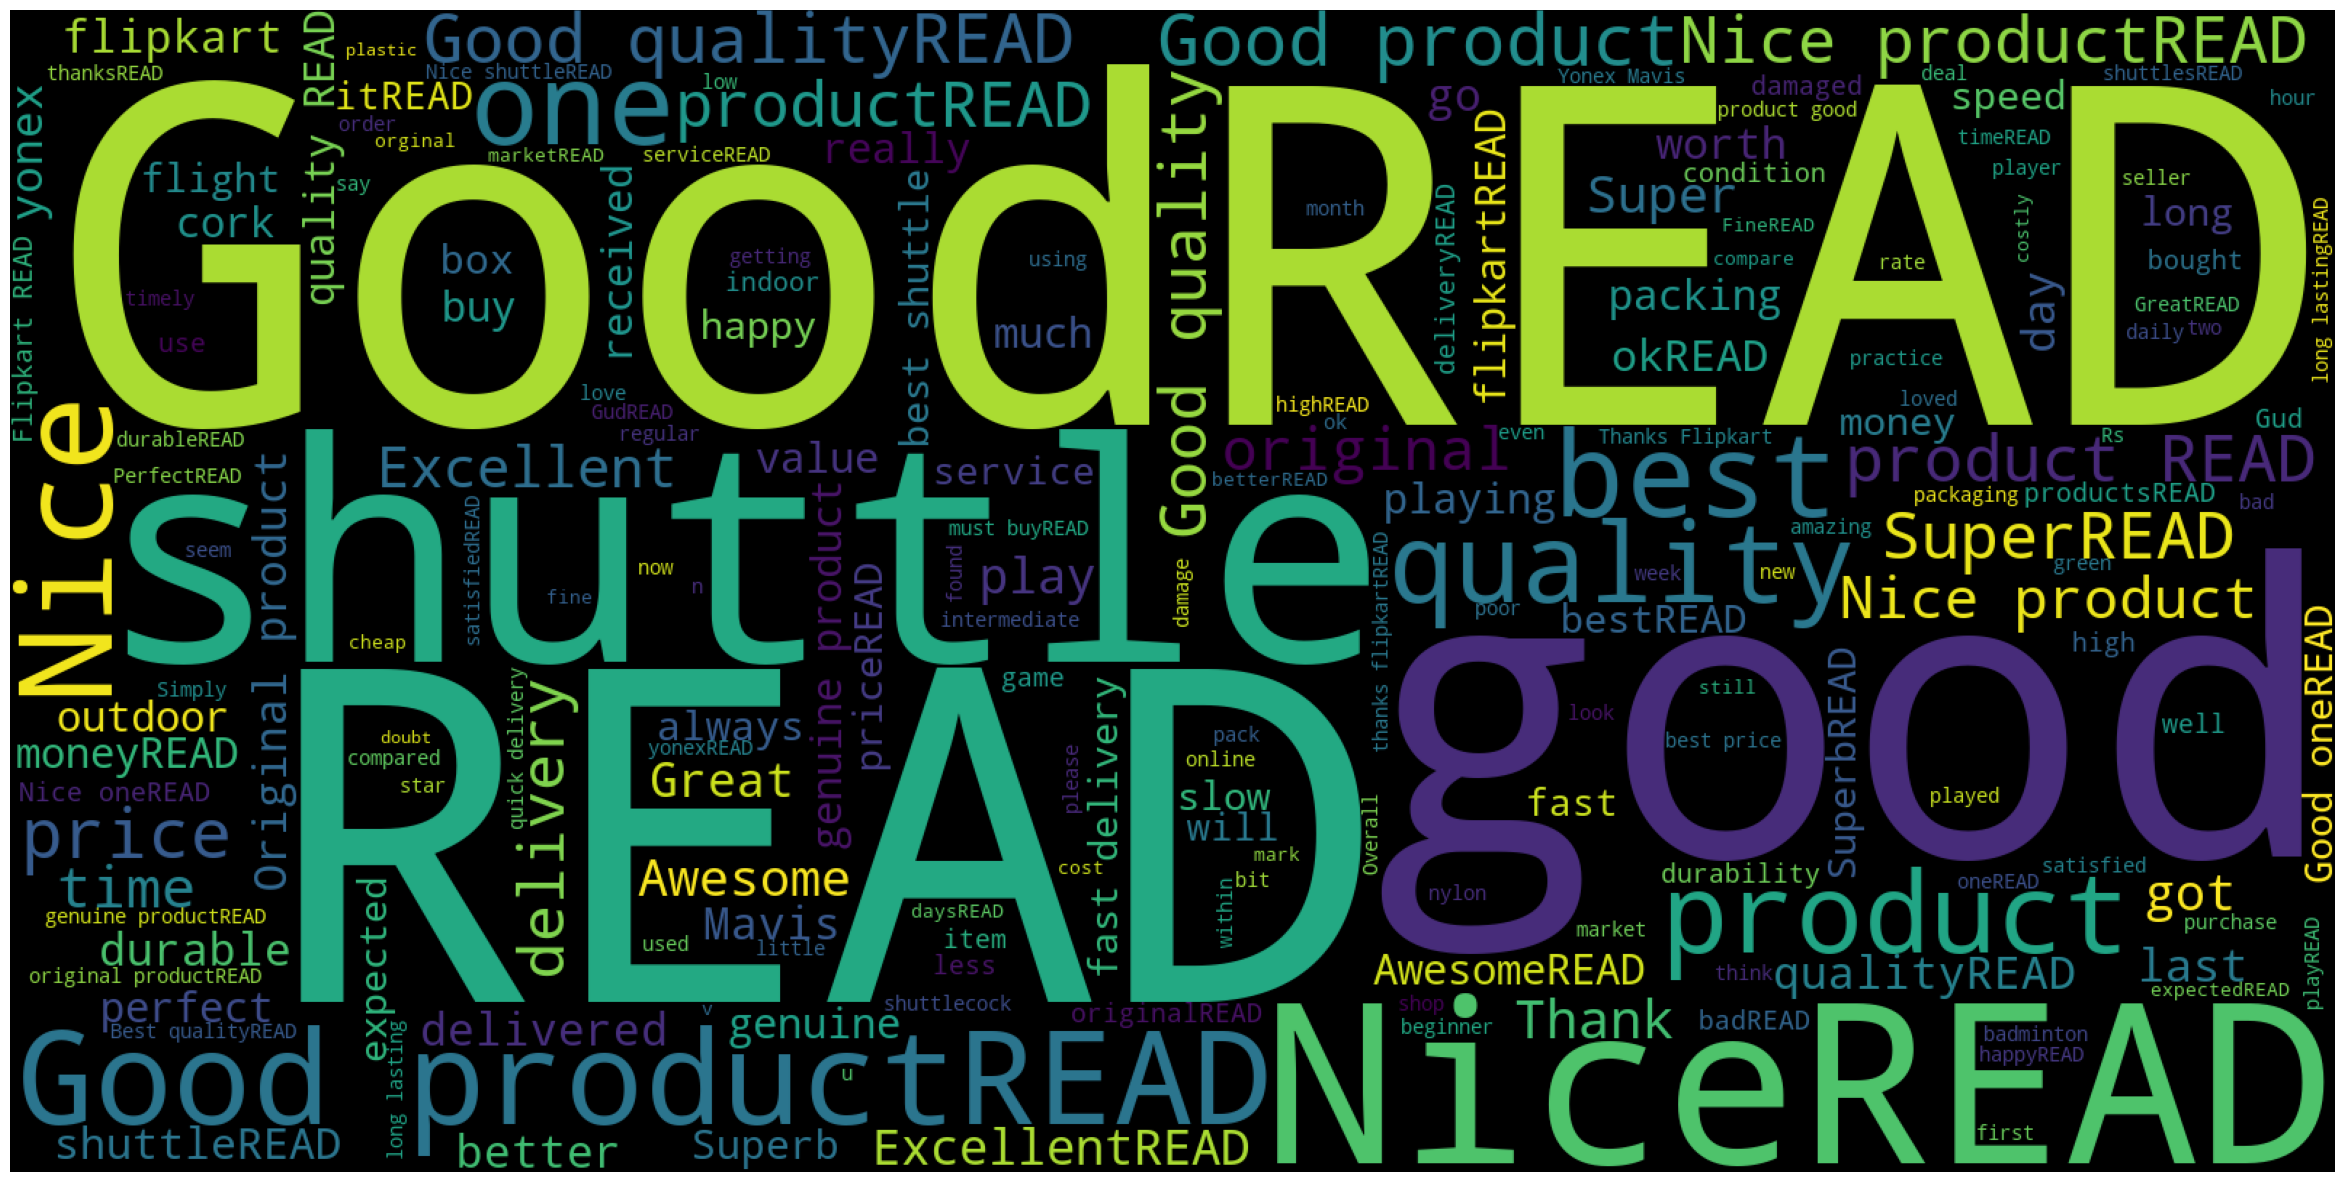

In [15]:
word_cloud(X_train[y_train == 1])

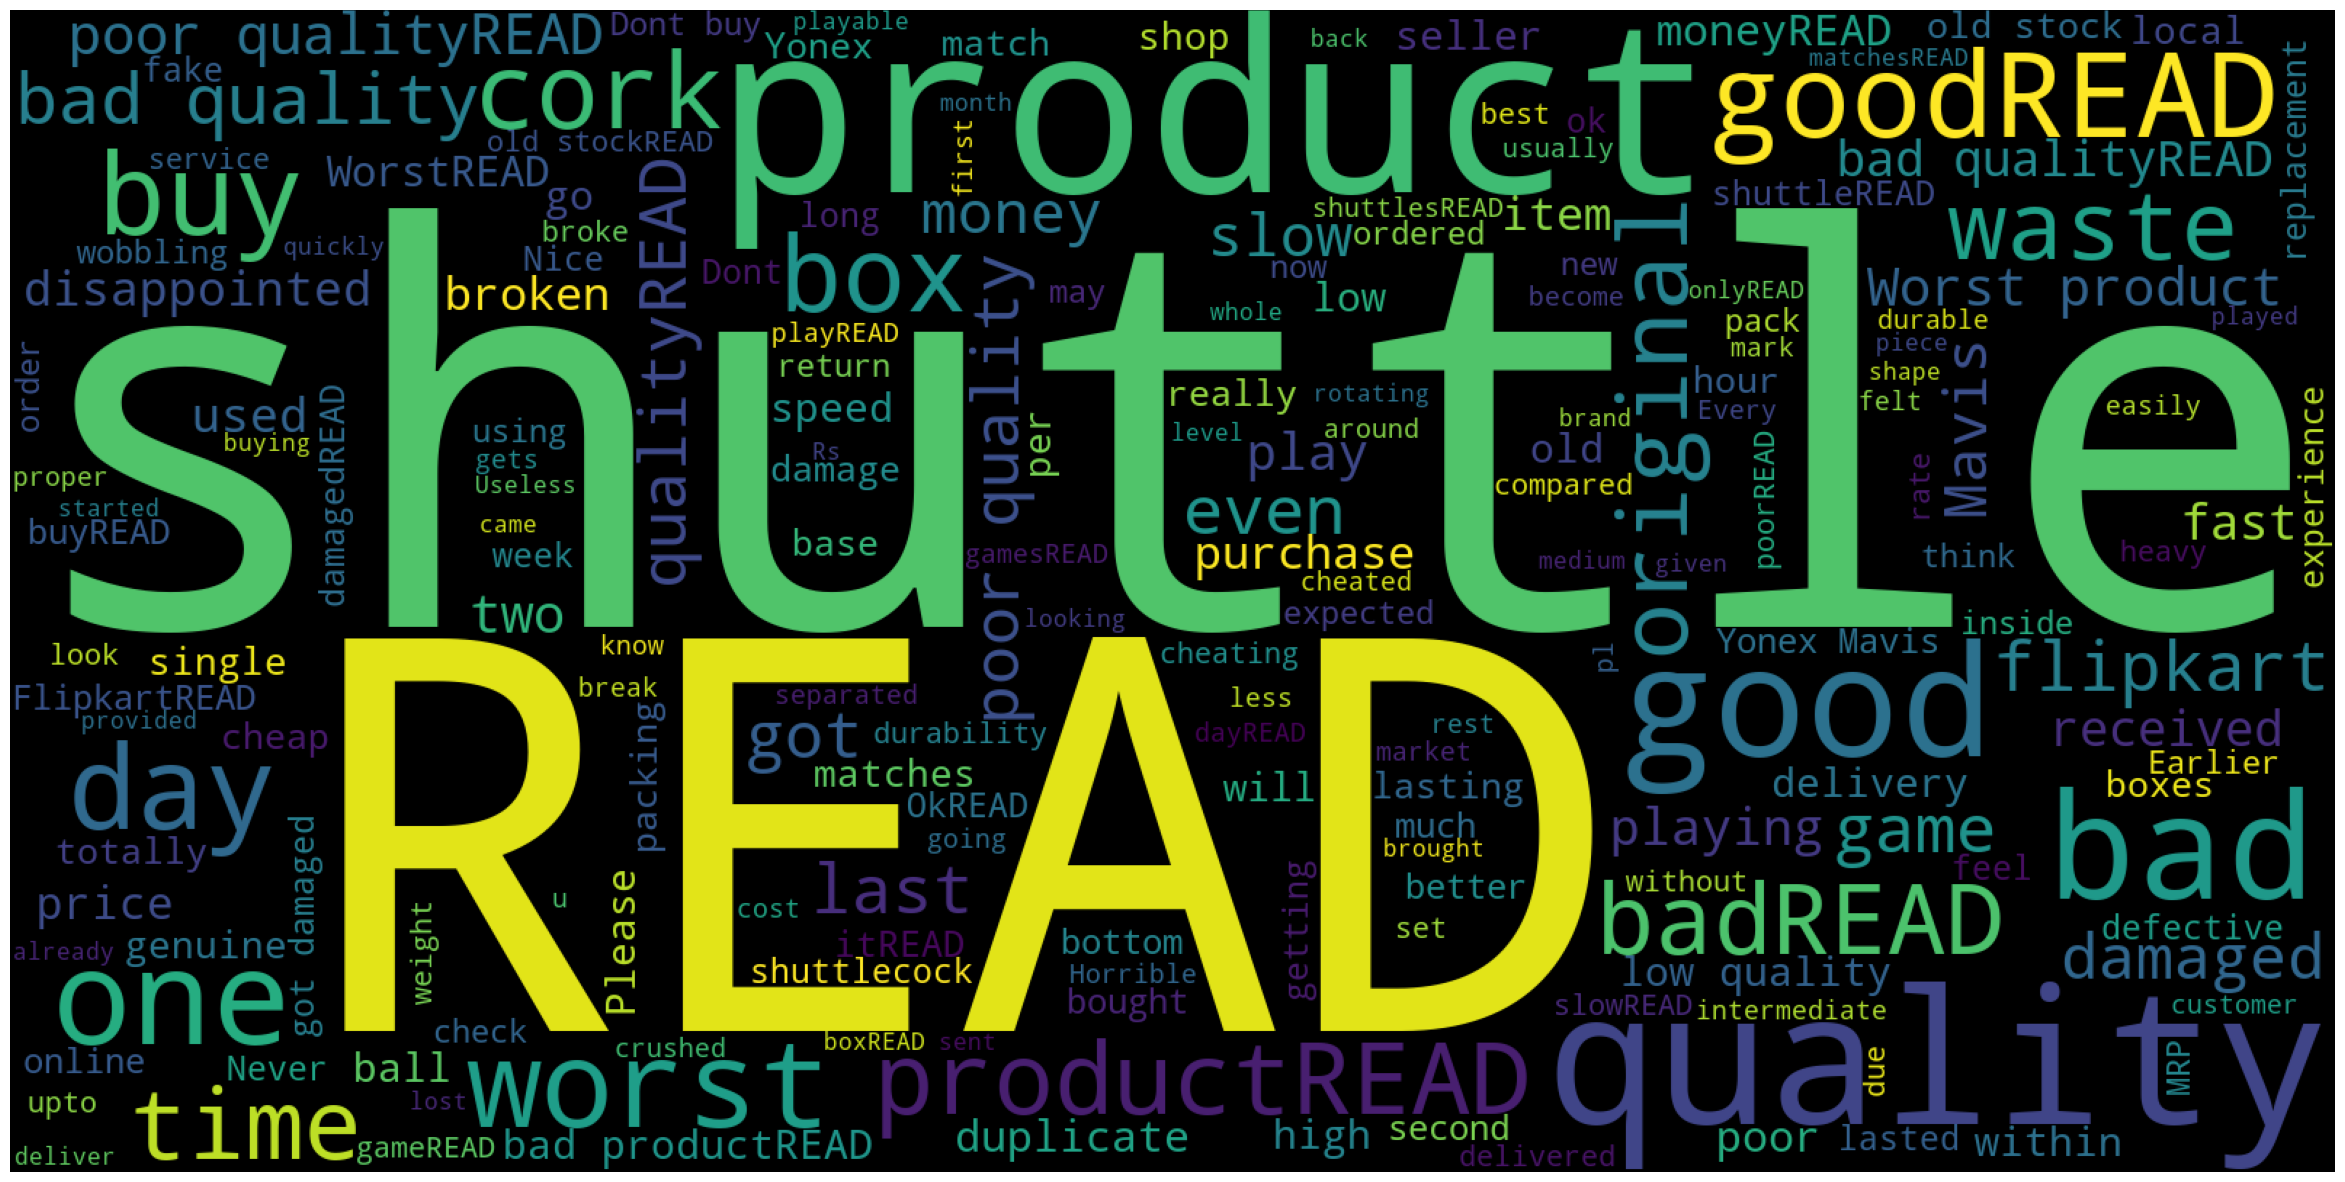

In [16]:
word_cloud(X_train[y_train == 0])

In [17]:
import nltk
nltk.data.path.append(r"C:\Users\User\AppData\Roaming\nltk_data")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [19]:
def clean(doc):
    # Remove special characters and digits
    sentence = re.sub("[^a-zA-Z]"," ", doc)
    # Convert to lower case
    sentence = sentence.lower()
    # Tokenize into words
    tokens = nltk.word_tokenize(sentence)

    # Lemmatize
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    filter_tokens = [word for word in lem_tokens if word.lower() not in stop_words]
    
    return " ".join(filter_tokens)

In [20]:
from tqdm import tqdm,tqdm_notebook
tqdm.pandas()

In [21]:
X_train_clean = X_train.progress_apply(lambda x : clean(x))

100%|█████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:07<00:00, 810.21it/s]


In [22]:
X_train_clean

1095                                            nice read
7326                                 good dry weatherread
1377                                       well brandread
2127    firstly yonex best company badminton shuttle b...
5096                                             goodread
                              ...                        
2895                                    quality good read
7813                          bad really good qualityread
905                                              goodread
5192                                              badread
235                                      bad quality read
Name: Review text, Length: 6382, dtype: object

In [23]:
X_test_clean = X_test.progress_apply(lambda x : clean(x))

100%|████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:01<00:00, 1267.73it/s]


In [24]:
X_test_clean

3733                     awesome read
3491                         goodread
2532                         niceread
4429    nice product better priceread
2698              genuine productread
                    ...              
1711                 nice productread
7950                         goodread
6058    time got substandard one read
5709                     best oneread
4951                         goodread
Name: Review text, Length: 2128, dtype: object

In [29]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Implementing machine learning pipeline with various hyper parameters

In [25]:
import warnings
warnings.filterwarnings('ignore')
import joblib
from joblib import Memory

In [28]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'decision_tree':Pipeline([
        ('vector',CountVectorizer()),
        ('classifier',DecisionTreeClassifier())
    ],memory = memory),
    'logistic_regression':Pipeline([
        ('vector',CountVectorizer()),
        ('classifier',LogisticRegression())
    ],memory = memory),
    'naive_bayes': Pipeline([
        ('vector', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'random_forest' :Pipeline([
        ('vector',CountVectorizer()),
        ('classifier',RandomForestClassifier())
    ],memory = memory)
}
param_grids = {
    'decision_tree':[
        {
            'vector': [CountVectorizer(), TfidfVectorizer()],
            'vector__max_features' : [1000, 1500, 2000, 4000, 5000],
            'classifier__max_depth': [None,3, 5, 10,15]
        }
    ],
    'logistic_regression': [
        {
            'vector': [CountVectorizer(), TfidfVectorizer()],
            'vector__max_features' : [1000, 1500, 2000, 3000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'naive_bayes':[
        {
            'vector': [CountVectorizer(),TfidfVectorizer()],
            'vector__max_features' : [1000, 1500, 2000, 3000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'random_forest':[
        {
        'vector': [CountVectorizer(),TfidfVectorizer()],
        'classifier__n_estimators': [50, 100, 200]
        }
    ]
}

In [40]:
best_model = {}

for algo in pipelines.keys():
    print(algo)
    clf = GridSearchCV(estimator = pipelines[algo],
                       param_grid = param_grids[algo],
                       scoring = 'f1',
                       cv = 5,
                       return_train_score = True,
                       verbose = 1
                      )
    %time clf.fit(X_train_clean,y_train)
    
    best_model[algo] = clf.best_estimator_
    print("SCORE:", clf.score(X_test_clean,y_test))

decision_tree
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 1min 6s
SCORE: 0.95093151403831
logistic_regression
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Wall time: 11min 12s
SCORE: 0.9404696886947024
naive_bayes
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 9.86 s
SCORE: 0.9542722759341522
random_forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 5min 17s
SCORE: 0.9534218058808223


# Best Model with good parameters

In [41]:
for name,model in best_model.items():
    print(name)
    print(model)

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vector', CountVectorizer(max_features=4000)),
                ('classifier', DecisionTreeClassifier(max_depth=15))])
logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vector', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])
naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vector', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])
random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vector', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])


In [42]:
import os
import joblib

# Create the directory if it does not exist
directory = 'best_models'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the models
for name, model in best_model.items():
    print(name)
    filename = os.path.join('Documents',f'{name}.pkl')
    joblib.dump(model, filename)

    # Load the models
    loaded_model = joblib.load(filename)


decision_tree
logistic_regression
naive_bayes
random_forest


In [43]:
for name,model in best_model.items():
    print(name)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    %time y_test_pred = model.predict(X_test_clean)
    
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

decision_tree
Wall time: 32 ms
Test Score (F1) 0.95093151403831
Model Size: 88824 Bytes
logistic_regression
Wall time: 24 ms
Test Score (F1) 0.9404696886947024
Model Size: 88297 Bytes
naive_bayes
Wall time: 25.1 ms
Test Score (F1) 0.9542722759341522
Model Size: 134470 Bytes
random_forest
Wall time: 261 ms
Test Score (F1) 0.9534218058808223
Model Size: 13282862 Bytes
